<a href="https://colab.research.google.com/github/FabioERodrigues/Loan-status-predictor-using-ml/blob/main/RealFinalCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Problem Statement:

The objective is to predict the Loan Status (e.g., Paid in Full or Charged Off) based on historical data. By identifying significant correlations between numerical features in the dataset, we aim to uncover key factors influencing loan outcomes.

In [ ]:
path = "/content/SBAnational.csv"
df = pd.read_csv(path)
df.head(5)

<ipython-input-364-13552a06ce5d>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
# shape of the dataset
df.shape

(899164, 27)

In [ ]:
# Taking the first 100000 rows from the dataset as its too big which could lead to high training times
df = df[:100000]

In [ ]:
# shape of the dataset now
df.shape

(100000, 27)

In [ ]:
# Number of Missing values
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,6
City,1
State,2
Zip,0
Bank,107
BankState,107
NAICS,0
ApprovalDate,0
ApprovalFY,0


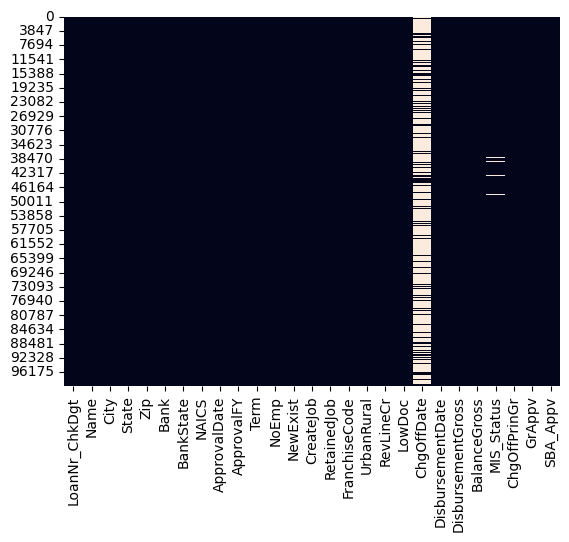

In [ ]:
# Heat map for the visualisation of the missing values
plt.plot("HEATMAP: MISSING VALUE COUNT")
sns.heatmap(df.isnull(),cbar = False)
plt.show()

In [ ]:
# checking for dupliacate rows
df.duplicated().sum()

0

In [ ]:
#Analysing the data types
df.dtypes

,0
LoanNr_ChkDgt,int64
Name,object
City,object
State,object
Zip,int64
Bank,object
BankState,object
NAICS,int64
ApprovalDate,object
ApprovalFY,object


In [ ]:
# new column names to make it easier to understand
new_column_names = [
    "Loan_ID",
    "Borrower_Name",
    "Borrower_City",
    "Borrower_State",
    "Borrower_ZipCode",
    "Lender_Name",
    "Lender_State",
    "NAICS_Code",
    "Approval_Date",
    "Approval_FiscalYear",
    "Loan_Term",
    "Number_Employees",
    "Business_Status",
    "Jobs_Created",
    "Jobs_Retained",
    "Franchise_Status",
    "Urban_Rural_Code",
    "Revolving_Credit",
    "LowDoc_Program",
    "Default_Date",
    "Disbursement_Date",
    "Disbursed_Amount",
    "Outstanding_Amount",
    "Loan_Status",
    "ChargedOff_Principal",
    "Approved_Amount",
    "SBA_Approved_Amount"
]

In [ ]:
# Rename columns while retaining data types
df.columns = new_column_names

In [ ]:
# Numerical features
Num_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [ ]:
Num_features

['Loan_ID',
 'Borrower_ZipCode',
 'NAICS_Code',
 'Loan_Term',
 'Number_Employees',
 'Business_Status',
 'Jobs_Created',
 'Jobs_Retained',
 'Franchise_Status',
 'Urban_Rural_Code']

In [ ]:
df[Num_features].head()

,Loan_ID,Borrower_ZipCode,NAICS_Code,Loan_Term,Number_Employees,Business_Status,Jobs_Created,Jobs_Retained,Franchise_Status,Urban_Rural_Code
0,1000014003,47711,451120,84,4,2.0,0,0,1,0
1,1000024006,46526,722410,60,2,2.0,0,0,1,0
2,1000034009,47401,621210,180,7,1.0,0,0,1,0
3,1000044001,74012,0,60,2,1.0,0,0,1,0
4,1000054004,32801,0,240,14,1.0,7,7,1,0


In [ ]:
# printing for every feature no of missing value and no of unique values
for feature in Num_features:
    print("{}:No of missing values:{} No of unique values:{}".format(feature,df[feature].isnull().sum(),df[feature].nunique()))

Loan_ID:No of missing values:0 No of unique values:100000
Borrower_ZipCode:No of missing values:0 No of unique values:16864
NAICS_Code:No of missing values:0 No of unique values:1142
Loan_Term:No of missing values:0 No of unique values:334
Number_Employees:No of missing values:0 No of unique values:266
Business_Status:No of missing values:0 No of unique values:3
Jobs_Created:No of missing values:0 No of unique values:83
Jobs_Retained:No of missing values:0 No of unique values:149
Franchise_Status:No of missing values:0 No of unique values:862
Urban_Rural_Code:No of missing values:0 No of unique values:3


In [ ]:
df['Urban_Rural_Code'].value_counts()

,count
Urban_Rural_Code,
1,54797
0,33690
2,11513


In [ ]:
df['Business_Status'].value_counts()

,count
Business_Status,
1.0,68258
2.0,31646
0.0,96


In [ ]:
df[Num_features].describe()

,Loan_ID,Borrower_ZipCode,NAICS_Code,Loan_Term,Number_Employees,Business_Status,Jobs_Created,Jobs_Retained,Franchise_Status,Urban_Rural_Code
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.375723e+09,48875.896310,405030.173210,91.887250,9.637800,1.315500,1.099990,3.481710,1735.091460,0.778230
std,2.157975e+08,31219.164465,255158.512981,68.187846,94.283457,0.466778,5.910504,13.693279,10184.774948,0.634706
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.187753e+09,19904.000000,236220.000000,58.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.386240e+09,46077.000000,448120.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.562678e+09,78744.000000,561621.000000,84.000000,8.000000,2.000000,0.000000,4.000000,1.000000,1.000000
max,1.739754e+09,99999.000000,928120.000000,461.000000,9999.000000,2.000000,1000.000000,3225.000000,91999.000000,2.000000


# CATEGORICAL FEATURE ANALYSIS

In [ ]:
# Extracting the categorical features from the dataset
Catg_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

From the provided output:

Numerical features are fully populated with no missing values.
The feature 'LoanNr_ChkDgt' appears to be constant throughout.
'NewExist' and 'UrbanRural' are identified as categorical features.

In [ ]:
Catg_features

['Borrower_Name',
 'Borrower_City',
 'Borrower_State',
 'Lender_Name',
 'Lender_State',
 'Approval_Date',
 'Approval_FiscalYear',
 'Revolving_Credit',
 'LowDoc_Program',
 'Default_Date',
 'Disbursement_Date',
 'Disbursed_Amount',
 'Outstanding_Amount',
 'Loan_Status',
 'ChargedOff_Principal',
 'Approved_Amount',
 'SBA_Approved_Amount']

In [ ]:
print("NO of Categorical features: ",len(Catg_features))

NO of Categorical features:  17


In [ ]:
df[Catg_features].head()

,Borrower_Name,Borrower_City,Borrower_State,Lender_Name,Lender_State,Approval_Date,Approval_FiscalYear,Revolving_Credit,LowDoc_Program,Default_Date,Disbursement_Date,Disbursed_Amount,Outstanding_Amount,Loan_Status,ChargedOff_Principal,Approved_Amount,SBA_Approved_Amount
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,28-Feb-97,1997,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,28-Feb-97,1997,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,28-Feb-97,1997,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,28-Feb-97,1997,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,28-Feb-97,1997,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
for feature in Catg_features:
    print("{}: No of categories: {}".format(feature,df[feature].nunique()))

Borrower_Name: No of categories: 94162
Borrower_City: No of categories: 13032
Borrower_State: No of categories: 51
Lender_Name: No of categories: 2520
Lender_State: No of categories: 52
Approval_Date: No of categories: 2002
Approval_FiscalYear: No of categories: 21
Revolving_Credit: No of categories: 7
LowDoc_Program: No of categories: 3
Default_Date: No of categories: 3739
Disbursement_Date: No of categories: 1536
Disbursed_Amount: No of categories: 27180
Outstanding_Amount: No of categories: 3
Loan_Status: No of categories: 2
ChargedOff_Principal: No of categories: 19331
Approved_Amount: No of categories: 4724
SBA_Approved_Amount: No of categories: 6320


In [ ]:
df["Loan_Status"].value_counts()

,count
Loan_Status,
P I F,74858
CHGOFF,24414


In [ ]:
# Missing values of each categories
for feature in Catg_features:
    print("{}:NO of missing values {}".format(feature, df[feature].isnull().sum()))

Borrower_Name:NO of missing values 6
Borrower_City:NO of missing values 1
Borrower_State:NO of missing values 2
Lender_Name:NO of missing values 107
Lender_State:NO of missing values 107
Approval_Date:NO of missing values 0
Approval_FiscalYear:NO of missing values 0
Revolving_Credit:NO of missing values 15
LowDoc_Program:NO of missing values 0
Default_Date:NO of missing values 74571
Disbursement_Date:NO of missing values 156
Disbursed_Amount:NO of missing values 0
Outstanding_Amount:NO of missing values 0
Loan_Status:NO of missing values 728
ChargedOff_Principal:NO of missing values 0
Approved_Amount:NO of missing values 0
SBA_Approved_Amount:NO of missing values 0


#Cleaning the data

In [ ]:
# removing the constant features
df.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
Num_features.remove("Loan_ID")
Num_features

['Borrower_ZipCode',
 'NAICS_Code',
 'Loan_Term',
 'Number_Employees',
 'Business_Status',
 'Jobs_Created',
 'Jobs_Retained',
 'Franchise_Status',
 'Urban_Rural_Code']

In [ ]:
df.dtypes

,0
Borrower_Name,object
Borrower_City,object
Borrower_State,object
Borrower_ZipCode,int64
Lender_Name,object
Lender_State,object
NAICS_Code,int64
Approval_Date,object
Approval_FiscalYear,object
Loan_Term,int64


In [ ]:
# Changing the Business_Status feature to int type
df['Business_Status'] = df['Business_Status'].astype('int')

In [ ]:
df[Num_features].dtypes

,0
Borrower_ZipCode,int64
NAICS_Code,int64
Loan_Term,int64
Number_Employees,int64
Business_Status,int64
Jobs_Created,int64
Jobs_Retained,int64
Franchise_Status,int64
Urban_Rural_Code,int64


In [ ]:
df[Num_features].isnull().sum()

,0
Borrower_ZipCode,0
NAICS_Code,0
Loan_Term,0
Number_Employees,0
Business_Status,0
Jobs_Created,0
Jobs_Retained,0
Franchise_Status,0
Urban_Rural_Code,0


In [ ]:
df['Franchise_Status'].value_counts()

,count
Franchise_Status,
1,62341
0,33994
78760,236
68020,103
50564,86
...,...
79200,1
60099,1
23375,1


In [ ]:
# Removing the Franchise_Status feature since majority of its value is 0 or 1 and its not very important
df.drop(columns=['Franchise_Status'],inplace=True)

In [ ]:
Num_features.remove("Franchise_Status")

In [ ]:
df['Business_Status'].value_counts()

,count
Business_Status,
1,68258
2,31646
0,96


In [ ]:
# changing the noise 0 to most frequent value
for i in range(len(df)):
    if df['Business_Status'].iloc[i] == 0:
        df['Business_Status'].iloc[i] = 1

<ipython-input-398-57ee0a486b8d>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Business_Status'].iloc[i] = 1
<ipython-input-398-57ee0a486b8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [ ]:
# CLEANING THE CATEGORICAL FEATURES

#Borrower_Name and Default_Date don't play a very essential role in the prediction which is why they'll be removed.
df.drop(columns=['Borrower_Name','Default_Date'],inplace=True)

In [ ]:
Catg_features.remove('Borrower_Name')
Catg_features.remove('Default_Date')

In [ ]:
df.shape

(100000, 23)

In [ ]:
# ignoring the tuples where the target feature is unknown
df = df[~df['Loan_Status'].isna()]
df = df[~df['Disbursement_Date'].isna()]

In [ ]:
df[Catg_features].isna().sum()

,0
Borrower_City,1
Borrower_State,1
Lender_Name,79
Lender_State,79
Approval_Date,0
Approval_FiscalYear,0
Revolving_Credit,15
LowDoc_Program,0
Disbursement_Date,0
Disbursed_Amount,0


In [ ]:
df.shape

(99155, 23)

In [ ]:
Missing_value_features = [feature for feature in Catg_features if df[feature].isna().sum() > 0] # Identify categorical features with missing values by checking if the number of missing values (NaN) is greater than 0.


In [ ]:
Missing_value_features

['Borrower_City',
 'Borrower_State',
 'Lender_Name',
 'Lender_State',
 'Revolving_Credit']

In [ ]:
# For each categorical feature with missing values, fill the missing entries with the most frequent value (mode) of that feature.
for feature in Missing_value_features:
    df[feature].fillna(df[feature].value_counts().index[0], inplace=True)

<ipython-input-407-e5ee71f88bbd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].value_counts().index[0], inplace=True)
<ipython-input-407-e5ee71f88bbd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
df[Catg_features].isna().sum()

,0
Borrower_City,0
Borrower_State,0
Lender_Name,0
Lender_State,0
Approval_Date,0
Approval_FiscalYear,0
Revolving_Credit,0
LowDoc_Program,0
Disbursement_Date,0
Disbursed_Amount,0


In [ ]:
#NOISE HANDLING
# Temp features
Temp_features = ['Disbursement_Date','Approval_Date']

for feature in Temp_features:
  Catg_features.remove(feature)

In [ ]:
for feature in Temp_features:
    df[feature] = pd.to_datetime(df[feature], dayfirst=True)

<ipython-input-410-cb6a76f92d27>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)
<ipython-input-410-cb6a76f92d27>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)


In [ ]:
df[Temp_features].head()

,Disbursement_Date,Approval_Date
0,1999-02-28,1997-02-28
1,1997-05-31,1997-02-28
2,1997-12-31,1997-02-28
3,1997-06-30,1997-02-28
4,1997-05-14,1997-02-28


In [ ]:
df['Revolving_Credit'].value_counts()

,count
Revolving_Credit,
N,49492
Y,32257
0,14040
T,3361
`,2
1,2
",",1


In [ ]:
df['Revolving_Credit'] = df['Revolving_Credit'].map({"N":"N",'Y':"Y"})

df['Revolving_Credit'] = df['Revolving_Credit'].fillna('UnKnown')

In [ ]:
df['Revolving_Credit'].value_counts()

,count
Revolving_Credit,
N,49492
Y,32257
UnKnown,17406


In [ ]:
df['LowDoc_Program'].value_counts()

,count
LowDoc_Program,
N,90878
Y,8246
C,31


In [ ]:
# Replace specific values with 'UnKnown'
df['LowDoc_Program'] = df['LowDoc_Program'].replace({'C': 'UnKnown'})

In [ ]:
df['LowDoc_Program'].value_counts()

,count
LowDoc_Program,
N,90878
Y,8246
UnKnown,31


In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
P I F,74792
CHGOFF,24363


In [ ]:
df[Catg_features].head()

,Borrower_City,Borrower_State,Lender_Name,Lender_State,Approval_FiscalYear,Revolving_Credit,LowDoc_Program,Disbursed_Amount,Outstanding_Amount,Loan_Status,ChargedOff_Principal,Approved_Amount,SBA_Approved_Amount
0,EVANSVILLE,IN,FIFTH THIRD BANK,OH,1997,N,Y,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,NEW PARIS,IN,1ST SOURCE BANK,IN,1997,N,Y,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,1997,N,N,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,1997,N,Y,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,1997,N,N,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
# List of financial features related to loan amounts, categorized as price-based numerical features for further processing.
Price_features = [
    "Disbursed_Amount",        # Total loan amount disbursed
    "Outstanding_Amount",      # Total outstanding loan balance
    "ChargedOff_Principal",    # Amount of loan charged off
    "Approved_Amount",         # Gross loan amount approved by the lender
    "SBA_Approved_Amount"      # SBA’s guaranteed amount for the approved loan
]

In [ ]:
# For each feature in Price_features, remove dollar signs ('$') and commas (',') from string values,
# then convert the cleaned strings into float data type for numerical analysis.
for feature in Price_features:
    df[feature] = df[feature].str.replace('$', '').str.replace(',', '').astype(float)
    df[feature] = df[feature].astype('float')

In [ ]:
df.head(5)

,Borrower_City,Borrower_State,Borrower_ZipCode,Lender_Name,Lender_State,NAICS_Code,Approval_Date,Approval_FiscalYear,Loan_Term,Number_Employees,...,Urban_Rural_Code,Revolving_Credit,LowDoc_Program,Disbursement_Date,Disbursed_Amount,Outstanding_Amount,Loan_Status,ChargedOff_Principal,Approved_Amount,SBA_Approved_Amount
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,...,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,...,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,...,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,...,0,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,...,0,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [ ]:
for feature in Price_features:
    Num_features.append(feature)
    Catg_features.remove(feature)

In [ ]:
df['Outstanding_Amount'].value_counts()

,count
Outstanding_Amount,
0.0,99153
12750.0,1
827875.0,1


In [ ]:
# Dropping Outstanding_Amount as majority of its values are 0
df.drop(columns=['Outstanding_Amount'],inplace=True)
Num_features.remove('Outstanding_Amount')

In [ ]:
Catg_features

['Borrower_City',
 'Borrower_State',
 'Lender_Name',
 'Lender_State',
 'Approval_FiscalYear',
 'Revolving_Credit',
 'LowDoc_Program',
 'Loan_Status']

In [ ]:
Num_features

['Borrower_ZipCode',
 'NAICS_Code',
 'Loan_Term',
 'Number_Employees',
 'Business_Status',
 'Jobs_Created',
 'Jobs_Retained',
 'Urban_Rural_Code',
 'Disbursed_Amount',
 'ChargedOff_Principal',
 'Approved_Amount',
 'SBA_Approved_Amount']

In [ ]:
Catg_features.remove('Approval_FiscalYear')
Num_features.append('Approval_FiscalYear')

In [ ]:
# Creating a mapping dictionary to encode categorical features into numerical values.
# For each categorical feature, assigning a unique integer to each unique category in that feature.

dictionary = {}

for feature in Catg_features:
    c = 1
    dictionary[feature] = {}
    for unique_val in df[feature].unique():
        dictionary[feature][unique_val] = c
        c += 1

In [ ]:
# Encoding the categorical features
for feature in Catg_features:
    df[feature] = df[feature].map(dictionary[feature])

In [ ]:
df[Catg_features].head()

,Borrower_City,Borrower_State,Lender_Name,Lender_State,Revolving_Credit,LowDoc_Program,Loan_Status
0,1,1,1,1,1,1,1
1,2,1,2,2,1,1,1
2,3,1,3,2,1,2,1
3,4,2,4,3,1,1,1
4,5,3,5,4,1,2,1


In [ ]:
#Making new features
Temp_features

['Disbursement_Date', 'Approval_Date']

In [ ]:
df[Temp_features].head()

,Disbursement_Date,Approval_Date
0,1999-02-28,1997-02-28
1,1997-05-31,1997-02-28
2,1997-12-31,1997-02-28
3,1997-06-30,1997-02-28
4,1997-05-14,1997-02-28


In [ ]:
from datetime import datetime

# Cleaning and filtering the date columns
df['Approval_Date'] = pd.to_datetime(df['Approval_Date'], errors='coerce')
df['Disbursement_Date'] = pd.to_datetime(df['Disbursement_Date'], errors='coerce')

# Removing rows with future or invalid dates
current_year = datetime.now().year
df = df[df['Approval_Date'].dt.year <= current_year]

# Droping rows with missing dates
df = df.dropna(subset=['Approval_Date', 'Disbursement_Date'])

# Create year and month features after cleaning
df['AppYear'] = df['Approval_Date'].dt.year
df['AppMonth'] = df['Approval_Date'].dt.month
df['Dismonth'] = df['Disbursement_Date'].dt.month

# Verify the range of AppYear
print(df['AppYear'].describe())


count    99135.000000
mean      2001.902577
std          5.077620
min       1978.000000
25%       1997.000000
50%       2005.000000
75%       2005.000000
max       2006.000000
Name: AppYear, dtype: float64


In [ ]:
# adding to Numerical features
Num_features.extend(['AppYear','AppMonth','Dismonth'])

In [ ]:
df['Business_Status'].value_counts()

,count
Business_Status,
1,67779
2,31356


In [ ]:
# since the Business_Statust is a categorical feature removing from the numerical feature and adding it categoriacl feature
Num_features.remove('Business_Status')
Catg_features.append('Business_Status')

In [ ]:
df.drop(columns=Temp_features,inplace=True)

In [ ]:
#DATA VISUALISATION

In [ ]:
df[Num_features].tail()

,Borrower_ZipCode,NAICS_Code,Loan_Term,Number_Employees,Jobs_Created,Jobs_Retained,Urban_Rural_Code,Disbursed_Amount,ChargedOff_Principal,Approved_Amount,SBA_Approved_Amount,Approval_FiscalYear,AppYear,AppMonth,Dismonth
99995,40336,453991,84,3,0,3,2,25000.0,0.0,25000.0,12500.0,2006,2006,3,4
99996,68106,0,84,8,0,0,0,60000.0,0.0,60000.0,48000.0,1998,1997,12,1
99997,43040,0,240,9,9,0,0,126000.0,0.0,126000.0,126000.0,1998,1997,12,10
99998,93274,524210,84,3,0,3,1,25000.0,0.0,25000.0,12500.0,2006,2006,3,4
99999,60411,321920,84,3,0,0,0,80000.0,0.0,80000.0,64000.0,1998,1997,12,2


In [ ]:
df[Catg_features].tail()

,Borrower_City,Borrower_State,Lender_Name,Lender_State,Revolving_Credit,LowDoc_Program,Loan_Status,Business_Status
99995,76,21,93,23,1,2,1,1
99996,707,47,38,1,1,1,1,2
99997,2299,20,202,1,1,2,1,2
99998,784,16,93,23,1,2,1,1
99999,570,7,1627,25,1,1,1,1


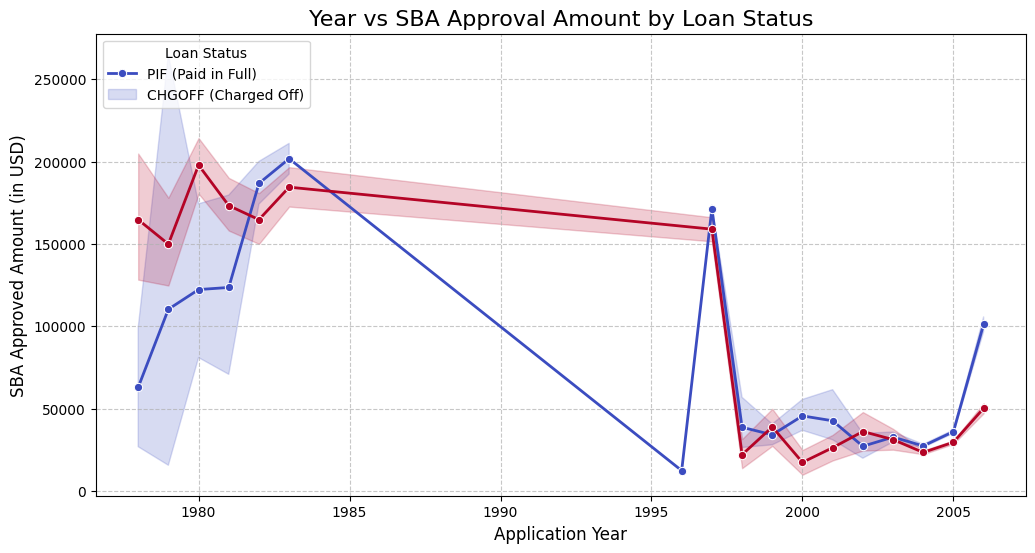

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the relationship between Application Year and SBA Approved Amount by Loan Status using a line plot.
# The plot includes markers, a color palette, and a legend to differentiate loan statuses (Paid in Full vs. Charged Off).
# Plot the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='AppYear', y='SBA_Approved_Amount', hue='Loan_Status',
             marker='o', palette='coolwarm', linewidth=2)
plt.title("Year vs SBA Approval Amount by Loan Status", fontsize=16)
plt.xlabel("Application Year", fontsize=12)
plt.ylabel("SBA Approved Amount (in USD)", fontsize=12)
plt.legend(title="Loan Status", labels=['PIF (Paid in Full)', "CHGOFF (Charged Off)"],
           title_fontsize=10, fontsize=10, loc='upper left', frameon=True)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

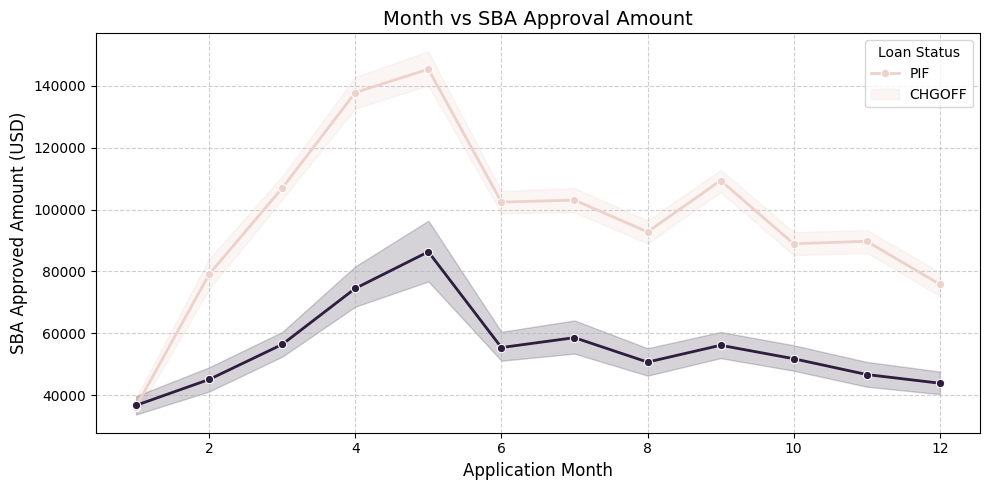

In [ ]:
# Visualizing the relationship between Application Month and SBA Approved Amount by Loan Status using a line plot.
# Includes markers, gridlines, and a legend to distinguish loan statuses (PIF: Paid in Full, CHGOFF: Charged Off).

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='AppMonth', y='SBA_Approved_Amount', hue='Loan_Status',
             marker='o', linewidth=2)
plt.title("Month vs SBA Approval Amount", fontsize=14)
plt.xlabel("Application Month", fontsize=12)
plt.ylabel("SBA Approved Amount (USD)", fontsize=12)
plt.legend(title="Loan Status", labels=['PIF', "CHGOFF"], fontsize=10, loc='best')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

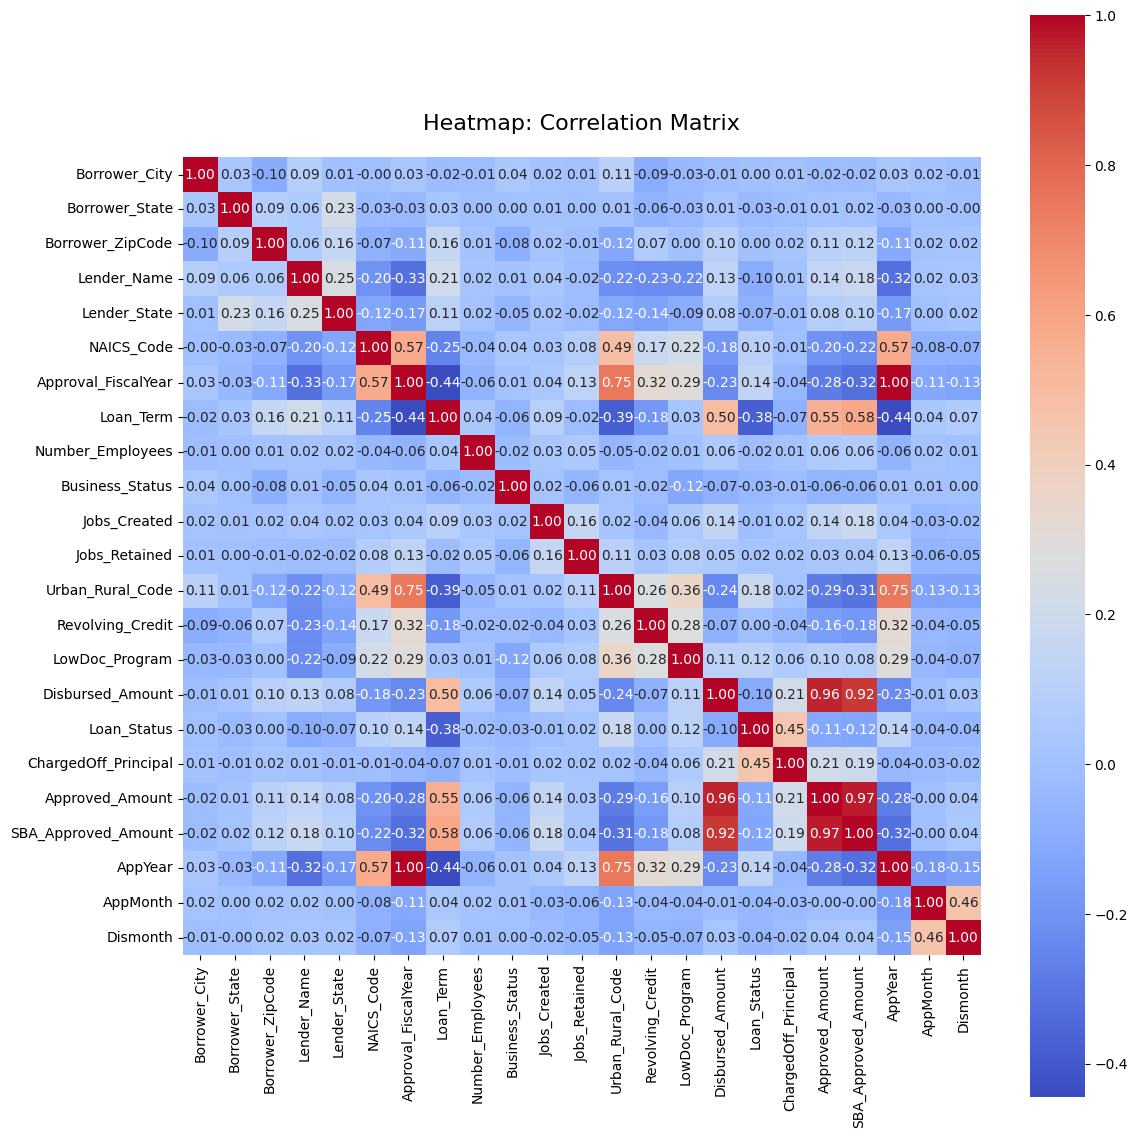

In [ ]:
# Generating a heatmap to visualize the correlation matrix of numerical features in the dataset.
# Includes annotations for correlation values, a color bar, and an adjusted figure size for readability.

plt.figure(figsize=(12, 12))  # Adjusted figure size for better readability
plt.title("Heatmap: Correlation Matrix", fontsize=16, pad=20)
sns.heatmap(df.corr(), annot=True, cbar=True, fmt=".2f", cmap="coolwarm", square=True)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['Borrower_City','Disbursed_Amount','Approved_Amount', 'Borrower_State', 'Approval_FiscalYear'],inplace=True)

In [ ]:
# Removing the list
Catg_features.remove('Borrower_City')
Catg_features.remove('Borrower_State')
Num_features.remove('Disbursed_Amount')
Num_features.remove('Approved_Amount')

In [ ]:
df.shape

(99135, 18)

#1. BINARY CLASSIFICATION with logistic regression



In [ ]:
# # # bINARY cLASSIFICATION
# df = df.sample(frac=1, random_state=1)
# df = df.reset_index(drop=True)

In [ ]:
# Move the 'Loan_Status' column to the end of the DataFrame for easier separation of features and target.
last_column = df.pop('Loan_Status')
df['Loan_Status'] = last_column

as_np =df.to_numpy()

# Calculating the index to split the data into 80% training and 20% testing.
index = int(len(as_np)*0.8)

# Separating the data into training features (X_train) and labels (y_train) and testing features (X_test) and labels (y_test).
X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

# Display the shapes of the training and testing datasets for verification.
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((79308, 17), (79308,)), ((19827, 17), (19827,)))

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features in the training and testing datasets to have a mean of 0 and a standard deviation of 1, ensuring consistent scaling for model training.
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test[0]

y_train

array([1., 1., 1., ..., 1., 2., 1.])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression().fit(X_train, y_train) # Training a Logistic Regression model using the standardized training data (X_train, y_train).
test_prediction = model.predict(X_test) # Predict the labels for the testing dataset (X_test).

pd.value_counts(test_prediction) # Count and display the frequency of each predicted label in the test predictions for analysis.

<ipython-input-451-d9912e92adc3>:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(test_prediction) # Count and display the frequency of each predicted label in the test predictions for analysis.


,count
1.0,14759
2.0,5068


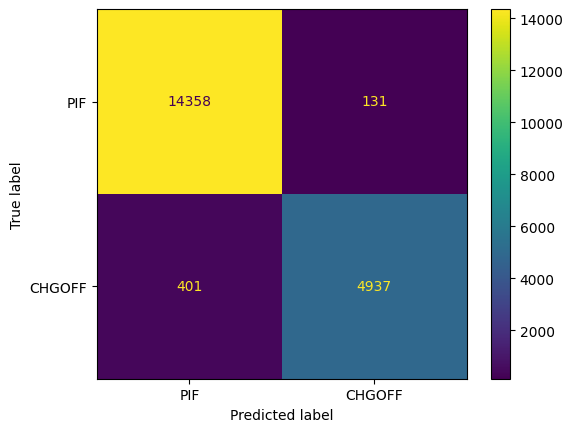

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and display a confusion matrix to evaluate the performance of the Logistic Regression model,
# comparing true labels (y_test) with predicted labels (test_prediction) for the classes 'PIF' and 'CHGOFF'.

cm =  confusion_matrix(y_test, test_prediction, labels=[1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['PIF', 'CHGOFF'])
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98     14489
         2.0       0.97      0.92      0.95      5338

    accuracy                           0.97     19827
   macro avg       0.97      0.96      0.97     19827
weighted avg       0.97      0.97      0.97     19827



**Sensitivity** **Analysis**

In [ ]:
# Extract the coefficients from the trained Logistic Regression model to understand feature importance.
coefficients = model.coef_[0]  # Logistic Regression coefficients
feature_names = df.drop(columns=['Loan_Status']).columns  # Original column names

# Create a DataFrame to link features with their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficients to see the most important features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
print(feature_importance)

                 Feature  Coefficient  Abs_Coefficient
12  ChargedOff_Principal    18.502879        18.502879
4              Loan_Term    -2.565882         2.565882
13   SBA_Approved_Amount    -1.773591         1.773591
14               AppYear    -0.935184         0.935184
11        LowDoc_Program     0.459102         0.459102
9       Urban_Rural_Code     0.408303         0.408303
0       Borrower_ZipCode     0.261419         0.261419
3             NAICS_Code     0.190524         0.190524
10      Revolving_Credit    -0.187868         0.187868
1            Lender_Name    -0.166099         0.166099
6        Business_Status     0.142637         0.142637
2           Lender_State    -0.128652         0.128652
8          Jobs_Retained    -0.105092         0.105092
5       Number_Employees    -0.096004         0.096004
16              Dismonth    -0.084359         0.084359
15              AppMonth     0.012876         0.012876
7           Jobs_Created     0.001046         0.001046


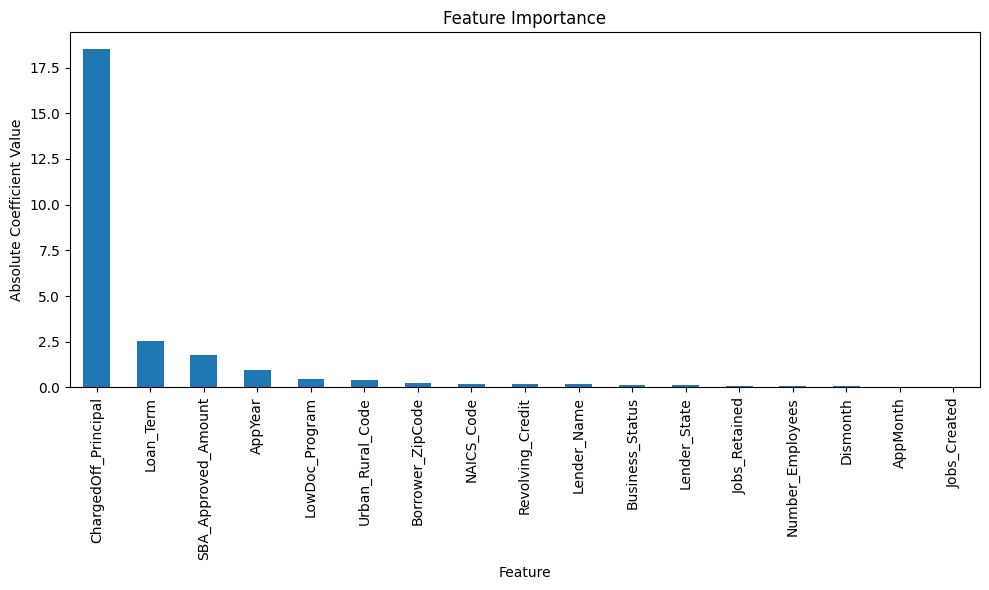

In [ ]:
# visulisingg the importance
feature_importance.plot(kind='bar', x='Feature', y='Abs_Coefficient', figsize=(10, 6), legend=False)
plt.title("Feature Importance")
plt.ylabel("Absolute Coefficient Value")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
sensitivity_results = []

for feature in ['SBA_Approved_Amount', 'Loan_Term', 'ChargedOff_Principal']:
    original_values = X_test[:, feature_names.get_loc(feature)]  # Get column index for the feature
    increased_values = original_values * 1.1  # Increase by 10%
    zero_values = original_values * 0  # values set to 0

    # Replace original values with perturbed values
    X_test_perturbed = X_test.copy()
    X_test_zero = X_test.copy()

    X_test_perturbed[:, feature_names.get_loc(feature)] = increased_values
    X_test_zero[:, feature_names.get_loc(feature)] = zero_values

    # Make predictions with the perturbed dataset
    predictions = model.predict(X_test_perturbed)
    predictions0 = model.predict(X_test_zero)

    # Calculate sensitivity impact
    sensitivity_results.append({
        'Feature': feature,
        'Original Accuracy': accuracy_score(y_test, test_prediction),
        '10% increase Accuracy': accuracy_score(y_test, predictions),
        'Values set to 0 Accuracy': accuracy_score(y_test, predictions0)
    })

# Display results
pd.DataFrame(sensitivity_results)

,Feature,Original Accuracy,10% increase Accuracy,Values set to 0 Accuracy
0,SBA_Approved_Amount,0.973168,0.975286,0.952993
1,Loan_Term,0.973168,0.976547,0.933273
2,ChargedOff_Principal,0.973168,0.969738,0.604176


#2 . Neural network with Tensor Flow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
df['Loan_Status'] = df['Loan_Status'].replace({1: 0, 2: 1}) # did this after getting highly negative loss numbers

In [ ]:
# Extract features and target
X = df.drop(columns=['Loan_Status']).values
y = df['Loan_Status'].values

# Train-test split
X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(X_train.shape, y_train.shape), (X_test.shape, y_test2.shape)

(((79308, 17), (79308,)), ((19827, 17), (19827,)))

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled[0]

y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Build the TensorFlow model
model2 = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model2.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1983/1983 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9274 - loss: 0.1868 - val_accuracy: 0.9862 - val_loss: 0.0519
Epoch 2/20
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0543 - val_accuracy: 0.9873 - val_loss: 0.0481
Epoch 3/20
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0476 - val_accuracy: 0.9894 - val_loss: 0.0419
Epoch 4/20
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9888 - loss: 0.0422 - val_accuracy: 0.9889 - val_loss: 0.0420
Epoch 5/20
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0424 - val_accuracy: 0.9898 - val_loss: 0.0412
Epoch 6/20
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9888 - loss: 0.0412 - val_accuracy: 0.9895 - val_loss: 0.0416
Epoch 7/20
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9883 - loss: 0.0445 - val_accuracy: 0.9900 - val_loss: 0.0403
Epoch 8/20
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9897 - loss: 0.0407 - val_accurac

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model2.evaluate(X_test_scaled, y_test2, verbose=0)

# Predictions and classification report
y_pred = (model2.predict(X_test_scaled) > 0.5).astype("int32")
#report = classification_report(y_test, y_pred)

#test_accuracy, report
print(classification_report(y_test2, y_pred))

620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14958
           1       0.97      0.99      0.98      4869

    accuracy                           0.99     19827
   macro avg       0.98      0.99      0.99     19827
weighted avg       0.99      0.99      0.99     19827



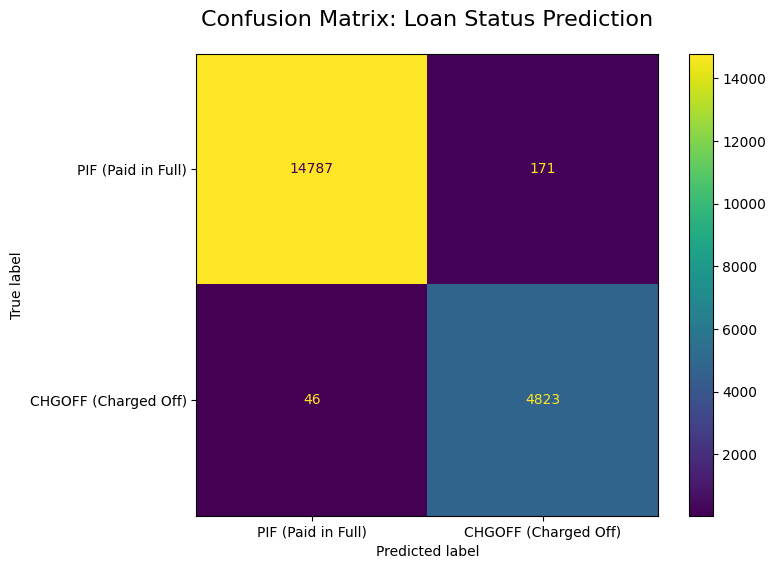

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, y_pred, labels=[0, 1])  # Labels for binary classification (0: PIF, 1: CHGOFF)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['PIF (Paid in Full)', 'CHGOFF (Charged Off)'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(values_format='d', ax=plt.gca())
plt.title("Confusion Matrix: Loan Status Prediction", fontsize=16, pad=20)
plt.grid(False)
plt.show()

**Sensitivity** **Analysis**

In [ ]:
from sklearn.metrics import accuracy_score

# Define function for permutation importance
def compute_permutation_importance(model, X_test, y_test):
    baseline_accuracy = accuracy_score(y_test, (model.predict(X_test) > 0.5).astype("int32"))
    feature_importance = []

    for i in range(X_test.shape[1]):
        # Shuffle a single feature column
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, i])

        # Compute accuracy with the shuffled feature
        permuted_accuracy = accuracy_score(y_test, (model.predict(X_test_permuted) > 0.5).astype("int32"))

        # Calculate the drop in accuracy
        importance = baseline_accuracy - permuted_accuracy
        feature_importance.append(importance)

    return feature_importance

# Compute permutation importance
importance_values = compute_permutation_importance(model2, X_test_scaled, y_test2)

# Link importance values to feature names
feature_names = df.drop(columns=['Loan_Status']).columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                 Feature  Importance
12  ChargedOff_Principal    0.340949
14               AppYear    0.016745
4              Loan_Term    0.015383
13   SBA_Approved_Amount    0.003631
1            Lender_Name    0.000656
11        LowDoc_Program    0.000403
0  

<Figure size 1000x600 with 0 Axes>

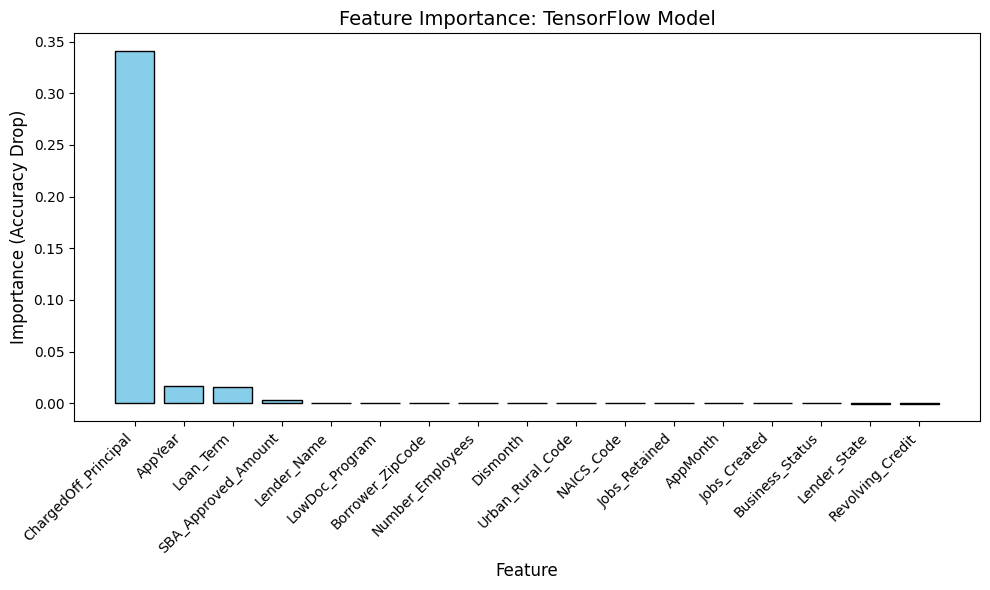

In [ ]:
# Visualize the importance of features in the TensorFlow model using a bar chart.
# Each bar represents the drop in accuracy when a specific feature is shuffled or removed.
plt.figure(figsize=(10, 6))  # Set the figure size for better readability.
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue', edgecolor='black')
plt.title('Feature Importance: TensorFlow Model', fontsize=14)
plt.ylabel('Importance (Accuracy Drop)', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Sensitivity analysis for TensorFlow model
sensitivity_results_model2 = []

for feature in ['SBA_Approved_Amount', 'Loan_Term', 'ChargedOff_Principal']:
    # Get the original values of the feature
    original_values = X_test_scaled[:, feature_names.get_loc(feature)]  # Get column index for the feature
    increased_value = original_values * 2 # Increase by 10%
    set_to_0 = original_values * 0 #set to 0

    # Replace the original feature values with perturbed values
    X_test_10 = X_test_scaled.copy()
    X_test_10[:, feature_names.get_loc(feature)] = increased_value

    # Replace the original feature values with perturbed values
    X_test_0 = X_test_scaled.copy()
    X_test_0[:, feature_names.get_loc(feature)] = set_to_0

    # Make predictions using the perturbed dataset
    predictions1 = (model2.predict(X_test_10) > 0.5).astype("int32")
      # Make predictions using the perturbed dataset
    predictions2 = (model2.predict(X_test_10) > 0.5).astype("int32")
    # Calculate sensitivity impact
    original_accuracy = accuracy_score(y_test2, (model2.predict(X_test_scaled) > 0.5).astype("int32"))
    increased_value = accuracy_score(y_test2, predictions1)
    set_to_0 = accuracy_score(y_test2, predictions2)
    sensitivity_results_model2.append({
        'Feature': feature,
        'Original Accuracy': original_accuracy,
        'increased value hy 10%': increased_value,
        'Value set to 0': set_to_0,
    })

# Convert results into a DataFrame
pd.DataFrame(sensitivity_results_model2)

620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Feature,Original Accuracy,increased value hy 10%,Value set to 0
0,SBA_Approved_Amount,0.989055,0.976799,0.976799
1,Loan_Term,0.989055,0.973168,0.973168
2,ChargedOff_Principal,0.989055,0.973269,0.973269


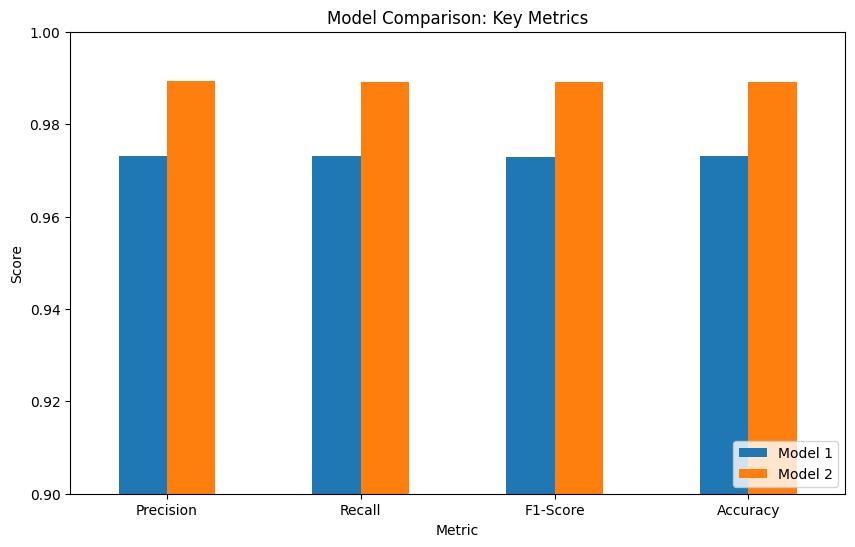

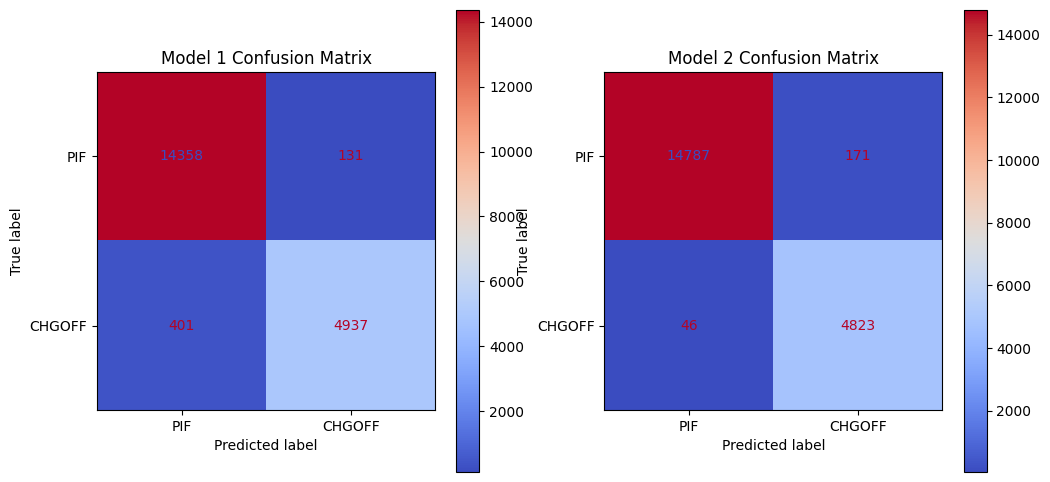

In [ ]:
#sensesimport pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Generate classification reports and store in a DataFrame
report1 = classification_report(y_test, test_prediction, output_dict=True)
report2 = classification_report(y_test2, y_pred, output_dict=True)

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Model 1': [
        report1['weighted avg']['precision'],
        report1['weighted avg']['recall'],
        report1['weighted avg']['f1-score'],
        report1['accuracy']
    ],
    'Model 2': [
        report2['weighted avg']['precision'],
        report2['weighted avg']['recall'],
        report2['weighted avg']['f1-score'],
        report2['accuracy']
    ]
})

# Plot metrics comparison
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Key Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0.9, 1)  # Adjust based on metric values
plt.legend(loc='lower right')
plt.show()


# Side-by-side confusion matrices
cm1 = confusion_matrix(y_test, test_prediction)
cm2 = confusion_matrix(y_test2, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(cm1, display_labels=['PIF', 'CHGOFF']).plot(ax=axes[0], cmap='coolwarm')
axes[0].set_title("Model 1 Confusion Matrix")

ConfusionMatrixDisplay(cm2, display_labels=['PIF', 'CHGOFF']).plot(ax=axes[1], cmap='coolwarm')
axes[1].set_title("Model 2 Confusion Matrix")
plt.show()
